# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [147]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [148]:
def corr_heatmap(num_corr):
    plt.figure(figsize=(12,6))
    
    mask  = np.triu(np.ones_like(num_corr.corr(),dtype=np.bool))
    sns.axes_style('white')
    heat_map = sns.heatmap(num_corr.corr(),mask=mask,annot=True,vmin=-1,vmax=1,cmap='coolwarm')
    plt.title('Correlation  Heatmap')
    plt.show() 

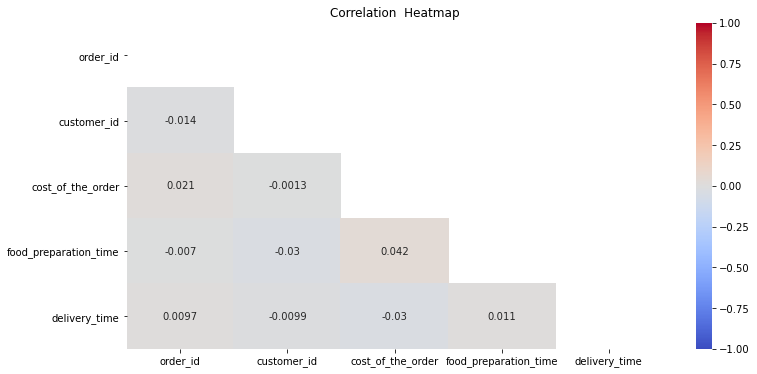

In [149]:
corr_heatmap(df)

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [4]:
# write your code here
df.shape


(1898, 9)

In [140]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_delivery_time      0
dtype: int64

#### Observations:
In the dataset, there are 1898 observations or entries and 9 variables and has no missing values

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [5]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset is made up  of 3 data types, order id, customer id, food preparation time and delivery time are of the data type int64. restaurant name, cuisine type, day of the week and rating are also of the object type but cost of the order is of float64.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:
The dataset now has 4 data types, order id, customer id, food preparation time and delivery time are of the data type int64. restaurant name, cuisine type and day of the week are also of the categorical type but cost of the order is of float64 and rating is still of object type

### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
# write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
On average, it takes about 27 minutes to prepare the food and about 24 minutes to deliver it. With these two the mean and median are pretty close to each other indicating those distributions are normally distributed or symmetric. Cost of the order on average is around 16 with a median which is lower indicating a slight right skew as also shown by the slightly larger difference between Q3 and maximum value compared to the others.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
(df['rating']=='Not given').sum()

736

#### Observations:
There are 736 orders that were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

Text(0.5, 1.0, 'Cost of the order')

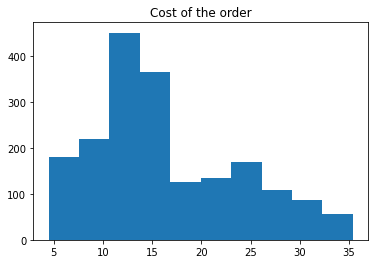

In [25]:
plt.hist(df['cost_of_the_order'], bins=10)
plt.title('Cost of the order')

The distribution of cost of order is positively(right) skewed, which means majority of people had costs that were lower but a few (little) that were much higher which could be considered outliers

Text(0.5, 1.0, 'Food preparation Time')

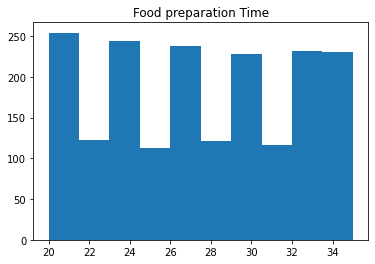

In [24]:
plt.hist(df['food_preparation_time'], bins=10)
plt.title('Food preparation Time')

The distribution of the time it takes to prepare the food appears to have a relativity uniform distribution if not right skew. This means that the amount of time it takes to prepare the meals are not significantly different.

Text(0.5, 1.0, 'Delivery Time')

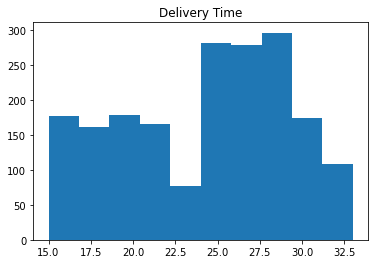

In [29]:
plt.hist(df['delivery_time'], bins=10)
plt.title('Delivery Time')

The distribution of the delivery time appears to be negatively skewed. this suggests that it took longer times to delivery most of the oders but a few took less time

Text(0.5, 1.0, 'Name of restaurants')

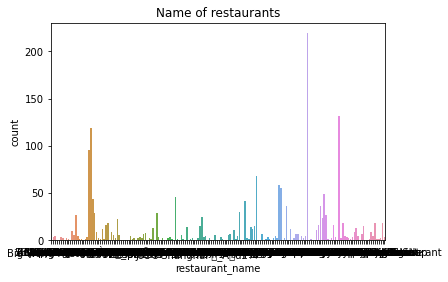

In [45]:
sns.countplot(df['restaurant_name'])
plt.title('Name of restaurants')

<AxesSubplot:>

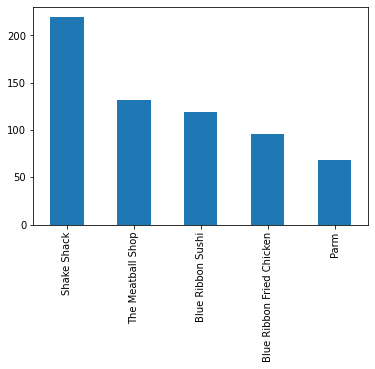

In [70]:
df['restaurant_name'].value_counts().head().sort_values(ascending= False).plot(kind='bar')

A distribution of the top 5 restaurant show Shake Shack with over 200 orders, followed by The meatball Shop and the fifth is Parm  

Text(0.5, 1.0, 'Type of Cuisine')

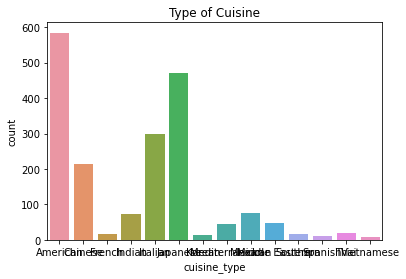

In [72]:
sns.countplot(df['cuisine_type'])
plt.title('Type of Cuisine')

<AxesSubplot:>

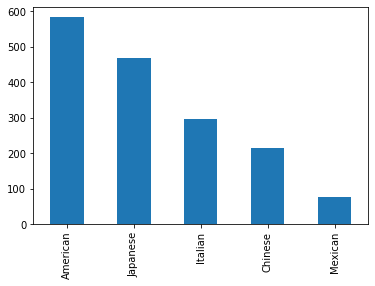

In [137]:
df['cuisine_type'].value_counts().head().sort_values(ascending= False).plot(kind='bar')

The distribution of cuisine type shows that more people like American food.

Text(0.5, 1.0, 'day_of_the_week')

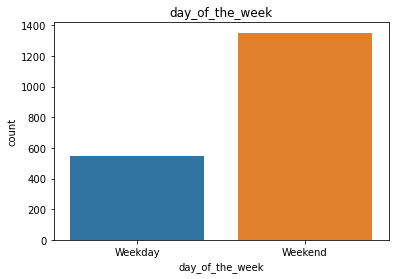

In [44]:
sns.countplot(df['day_of_the_week'])
plt.title('day_of_the_week')

The distribution of Day of the week shows that most customer order food on the weekend

Text(0.5, 1.0, 'rating')

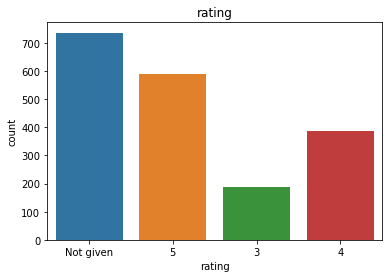

In [142]:
sns.countplot(df['rating'])
plt.title('rating')

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [143]:
# write the code here
df['restaurant_name'].value_counts()[:5].sort_values(ascending= False)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The data shows that Shake Shack has had the highest number of orders at 219, with the 5th highest being Parm at 68 orders. Thus
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [144]:
# write the code here
day = df[df['day_of_the_week']=='Weekend']
day['cuisine_type'].value_counts()[:5].sort_values(ascending=False)

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on the weekends is American at 415.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [11]:
# write the code here
cost20 = df[df['cost_of_the_order']>20]
len(cost20)

555

In [12]:
len(cost20)/len(df)*100

29.24130663856691

#### Observations:
There are 555 orders that cost over 20 dollars and that constitute 29.24% of the entire orders.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [13]:
# write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
On average it takes about 24.16 minutes to deliver food to customers.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [139]:
#df['cost_of_the_order'].max()
highestspender = df[df['cost_of_the_order']==df['cost_of_the_order'].max()]
highestspender

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,50


#### Observations:
The customer with customer_id of 62359 should get the free coupon since he spent the highest amount on a single order.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

In [57]:
df1 = df[['cost_of_the_order',
       'food_preparation_time', 'delivery_time']]
df1.head()

,cost_of_the_order,food_preparation_time,delivery_time
0,30.75,25,20
1,12.08,25,23
2,12.23,23,28
3,29.20,25,15
4,11.59,25,24


<AxesSubplot:>

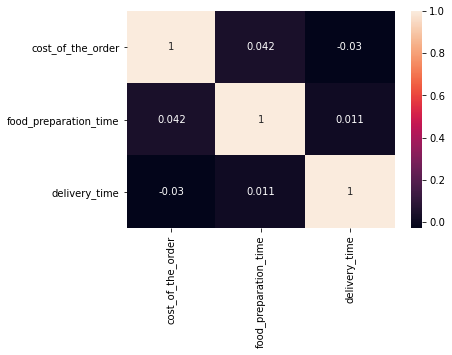

In [55]:
sns.heatmap(df1.corr(), annot=True) 

There seem to be a very weak ( close to 0) correlation between all of food preparation time, cost of the order and delivery time. Any combination of 2 has a very weak correlation whether negative or positive.

Text(0.5, 1.0, 'correlation of the numerical variables')

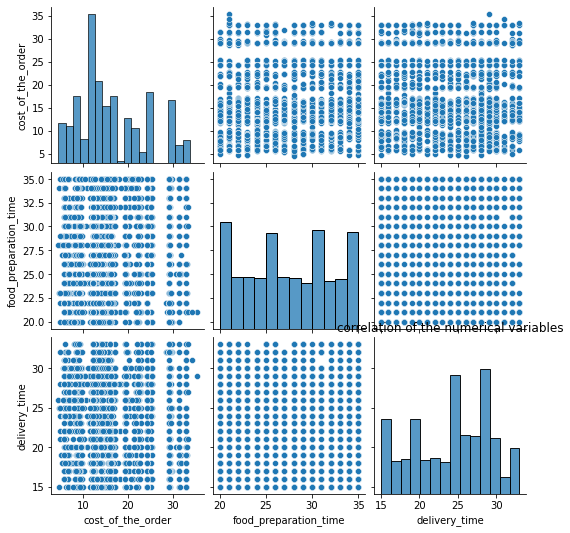

In [76]:
sns.pairplot(df1)
plt.title('correlation of the numerical variables')

A pair plot for the 3 numerical variables show no or very very weak relationship between any 2 combination of food preparation time, delivery time and cost of ordder.

Text(0.5, 1.0, 'Cuisine Type vs Day of the week')

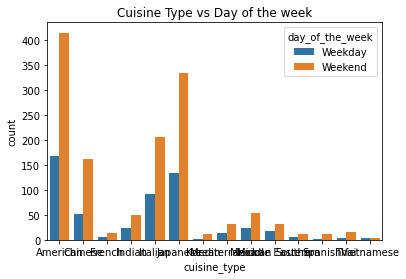

In [62]:

sns.countplot(data = df, x='cuisine_type',hue='day_of_the_week')
plt.title('Cuisine Type vs Day of the week')

Looking at the relationnship between cuisine type and Day of the week, it appears that people buy more American Cuisines on both week days and on the weekend than any other Cuisine

<AxesSubplot:xlabel='delivery_time', ylabel='day_of_the_week'>

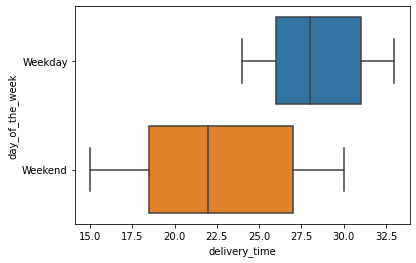

In [66]:
sns.boxplot(data = df, x='deliver_time', y ='day_of_the_week')

A boxplot of the delivery time shows that the measure of dispersion (range) is higher on the weekends than on the weekdays. That is the delivery times during the weekend is widely spreadout from a minimum of about 15 minutes to 30 minutes than on the weekdays that has minimum of about 24 to a maximum of 33 minutes. The median delivery time is higher on the weekdays than on the weekend. The shape of both distributions appear to be slightly normal, with no potential outliers. Thus it takes longer to deliver food during the week than on the weekend.

<AxesSubplot:xlabel='cost_of_the_order', ylabel='day_of_the_week'>

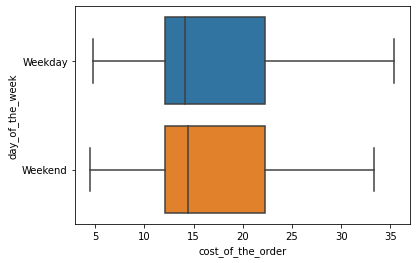

In [67]:
sns.boxplot(data = df, x='cost_of_the_order', y ='day_of_the_week')

A boxplot of the cost of the order shows that the measure of dispersion (range) is slightly higher on the weekdays than on the weekend. The median delivery time is about the same on the weekdays and on the weekend. The shape of both distributions appear to be slightly right skewed, with no potential outliers

<AxesSubplot:xlabel='food_preparation_time', ylabel='day_of_the_week'>

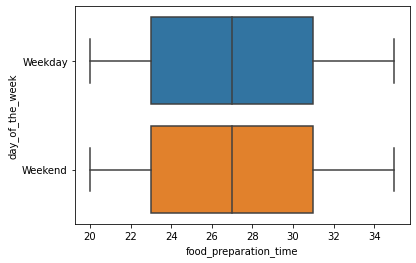

In [68]:
sns.boxplot(data = df, x='food_preparation_time', y ='day_of_the_week')

A boxplot of the food preparation time shows the same for whether it is a weekday or weekend.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [87]:
# write the code here
newdf = df[df['rating']!='Not given']
newdf.shape

(1162, 9)

In [112]:
newdf['rating'] = newdf['rating'].astype('int64')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1162 non-null   int64   
 1   customer_id            1162 non-null   int64   
 2   restaurant_name        1162 non-null   category
 3   cuisine_type           1162 non-null   category
 4   cost_of_the_order      1162 non-null   float64 
 5   day_of_the_week        1162 non-null   category
 6   rating                 1162 non-null   int64   
 7   food_preparation_time  1162 non-null   int64   
 8   delivery_time          1162 non-null   int64   
dtypes: category(3), float64(1), int64(5)
memory usage: 74.3 KB


In [93]:
df_count = newdf.groupby(['restaurant_name'])['rating'].count().reset_index()
df_count

,restaurant_name,rating
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Alidoro,0
...,...,...
173,Zero Otto Nove,1
174,brgr,1
175,da Umberto,1
176,ilili Restaurant,13


In [113]:
df50 = df_count[df_count['rating']>50].reset_index()
df50

,index,restaurant_name,rating
0,20,Blue Ribbon Fried Chicken,64
1,21,Blue Ribbon Sushi,73
2,136,Shake Shack,133
3,153,The Meatball Shop,84


In [105]:
avgrating = newdf.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avgrating

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
173,Rohm Thai,NaN
174,Room Service,NaN
175,Spice Thai,NaN
176,Tarallucci e Vino Restaurant,NaN


In [108]:
avg4 = avgrating[avgrating['rating']>4]
avg4

,restaurant_name,rating
0,'wichcraft,5.000000
1,Ravagh Persian Grill,5.000000
2,Chola Eclectic Indian Cuisine,5.000000
3,Chote Nawab,5.000000
4,Junoon,5.000000
...,...,...
105,Cafe Mogador,4.153846
106,ilili Restaurant,4.153846
107,Parm,4.128205
108,Rubirosa,4.125000


In [117]:
count50 = ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']

In [118]:
avg4[avg4['restaurant_name'].isin(count50)]

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


#### Observations:
There are four restaurants that fulfil the criteria of this promotional offer.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [134]:
# write the code here
cost20 = df[df['cost_of_the_order']>20]
c20 = (cost20['cost_of_the_order']*0.25).sum()

In [129]:
cost5 = df[df['cost_of_the_order']>5]

In [135]:
costbelow20 = cost5[cost5['cost_of_the_order']<=20]
c5 = (costbelow20['cost_of_the_order']*0.15).sum()

In [136]:
net_revenue = c20 + c5
net_revenue

6166.303

#### Observations:
The company made $6166.30 in net revenue

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [120]:
# write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,54


In [122]:
total60 = df[df['total_delivery_time']>60]
total60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64
...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62


In [123]:
len(total60)/len(df)*100

10.537407797681771

#### Observations:
The total delivery time greater than 60 as a percentage of the total delivery time is 10.537%

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [124]:
# write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time on weekdays is higher than that of the weekends, perhaps because of traffic during the the weekdays.

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00
total_delivery_time,1898.0,5.153372e+01,6.833603,35.00,47.00,52.00,5.600000e+01,68.00


### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:
Looking at the overall data, we can see that the most popular cuisine to order is American cuisine and most of the orders are made on the weekends. Also, according to the data the restaurant with the most orders is Shake Shack. On average, customers spent around 16 dollars on their order. Also while it took around 27 minutes on average to prepare the food, it takes about 24 minutes to delivery it. This means that it takes close to an hour on average for customers to get their food from the time they make their order till when it is delivered. 

Recommendations:
It is evident that from this data the mostly ordered cuisine is American and the most orders came from Shake Shack, such a restaurant can be incentivised to stay on the app since more customers order their food from there. It can also be suggested that the company puts more American restaurants on their platform. 

It is clear that customers order food mostly on the weekends and therefore to increase the volume of the orders during the week days, promotions like free delivery and discounts should be made on weekday orders to help grow the order volume during those days.

The mean delivery time for oders on weekdays is higher than on weekend so measures should be put in place to try and curtail the delivery time on the weekdays so that customers will be encouraged to order during the week. It is also imperative to say that reducing the delivery time in general will make customers happy.

With regards to the meal preparation time, it takes on average 27 minutes to get orders out the door, the company can incentivize the restaurants to cut their food preparation time which will intend cut the total delivery time. The company can do this by rewarding restaurant with rush orders.

It is good that the company rewards high spending customers but it will be equally good to reward restaurants that have high levels of orders coming in and also have good rating particularly over 4.

Also less than a third of the entire orders was above 20 dollars. Promotional offers like get 5 dollars off your purchase of 50 dollars can be put in place to encourage customers to increase their purchasing power and order more than 20 dollars.

